# Introduction

**Author: Samanyu**<br>
**Language: Python**<br>
**Accelerator: None**

In [37]:
# importing
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re

pd.set_option('display.max_columns',None)

**Data Card:**<br><br>

1. DR_NO<br>
Data Type: int64<br>
Non-Null Count: 1,005,109<br>
Description: Unique identifier for the crime report (Division of Records Number). Used to track individual crime incidents.<br><br>
2. Date Rptd<br>
Data Type: object<br>
Non-Null Count: 1,005,109<br>
Description: Date the crime was reported to the police, typically in a string format (e.g., MM/DD/YYYY). Indicates when the authorities were notified.<br><br>
3. DATE OCC<br>
Data Type: object<br>
Non-Null Count: 1,005,109<br>
Description: Date the crime occurred, in a string format (e.g., MM/DD/YYYY). Represents the actual date of the incident, which may differ from the reported date.<br><br>
4. TIME OCC<br>
Data Type: int64<br>
Non-Null Count: 1,005,109<br>
Description: Time the crime occurred, likely in 24-hour format (e.g., 1430 for 2:30 PM). Represents the approximate time of the incident.<br><br>
5. AREA<br>
Data Type: int64<br>
Non-Null Count: 1,005,109<br>
Description: Numeric code representing the geographic area or police division where the crime occurred (e.g., 1 for Central, 2 for Rampart).<br><br>
6. AREA NAME<br>
Data Type: object<br>
Non-Null Count: 1,005,109<br>
Description: Name of the geographic area or police division corresponding to the AREA code (e.g., "Central", "Rampart").<br><br>
7. Rpt Dist No<br>
Data Type: int64<br>
Non-Null Count: 1,005,109<br>
Description: Reporting District Number, a more granular geographic identifier within an AREA, used for mapping and analysis.<br><br>
8. Part 1-2<br>
Data Type: int64<br>
Non-Null Count: 1,005,109<br>
Description: Indicates whether the crime is classified as Part 1 (serious, e.g., homicide, robbery) or Part 2 (less serious, e.g., vandalism). Typically, 1 or 2.<br><br>
9. Crm Cd<br>
Data Type: int64<br>
Non-Null Count: 1,005,109<br>
Description: Crime Code, a numeric identifier for the type of crime committed (e.g., 310 for burglary).<br><br>
10. Crm Cd Desc<br>
Data Type: object<br>
Non-Null Count: 1,005,109<br>
Description: Description of the crime corresponding to the Crime Code (e.g., "BURGLARY" for Crm Cd 310).<br><br>
11. Mocodes<br><br>
Data Type: object
Non-Null Count: 853,403<br>
Description: Modus Operandi codes, describing specific characteristics or methods of the crime (e.g., entry method, suspect behavior). May contain multiple codes, often space-separated.<br><br>
12. Vict Age<br>
Data Type: int64<br>
Non-Null Count: 1,005,109<br>
Description: Age of the victim at the time of the crime. May include 0 or negative values for unknown or inapplicable cases.<br><br>
13. Vict Sex<br>
Data Type: object<br>
Non-Null Count: 860,379<br>
Description: Sex of the victim, typically represented as 'M' (Male), 'F' (Female), or other codes (e.g., 'X' for unknown or non-binary).<br><br>
14. Vict Descent<br>
Data Type: object<br>
Non-Null Count: 860,367<br>
Description: Descent or ethnicity of the victim, represented by codes (e.g., 'H' for Hispanic, 'B' for Black, 'W' for White, 'X' for unknown).<br><br>
15. Premis Cd<br>
Data Type: float64<br>
Non-Null Count: 1,005,093<br>
Description: Numeric code for the type of premises where the crime occurred (e.g., 101 for single-family residence).<br><br>
16. Premis Desc<br>
Data Type: object<br>
Non-Null Count: 1,004,521<br>
Description: Description of the premises corresponding to the Premis Cd (e.g., "SINGLE FAMILY DWELLING").<br><br>
17. Weapon Used Cd<br>
Data Type: float64<br>
Non-Null Count: 327,259<br>
Description: Numeric code for the weapon used in the crime, if any (e.g., 400 for firearm). Null if no weapon was involved.<br><br>
18. Weapon Desc<br>
Data Type: object<br>
Non-Null Count: 327,259<br>
Description: Description of the weapon corresponding to the Weapon Used Cd (e.g., "HAND GUN"). Null if no weapon was used.<br><br>
19. Status<br>
Data Type: object<br>
Non-Null Count: 1,005,108<br>
Description: Status code of the crime investigation (e.g., 'AA' for Adult Arrest, 'IC' for Investigation Continued).<br><br>
20. Status Desc<br>
Data Type: object<br>
Non-Null Count: 1,005,109<br>
Description: Description of the investigation status corresponding to the Status code (e.g., "Adult Arrest", "Invest Cont").<br><br>
21. Crm Cd 1<br>
Data Type: float64<br>
Non-Null Count: 1,005,098<br>
Description: Primary crime code for the incident, typically matching Crm Cd but used for reporting hierarchy.<br><br>
22. Crm Cd 2<br>
Data Type: float64<br>
Non-Null Count: 69,154<br>
Description: Secondary crime code, if the incident involved multiple offenses. Null if only one crime was reported.<br><br>
23. Crm Cd 3<br>
Data Type: float64<br>
Non-Null Count: 2,314<br>
Description: Tertiary crime code, for incidents with multiple offenses. Rarely used, hence low non-null count.<br><br>
24. Crm Cd 4<br>
Data Type: float64<br>
Non-Null Count: 64<br>
Description: Quaternary crime code, for rare cases with multiple offenses. Extremely low non-null count.<br><br>
25. LOCATION<br>
Data Type: object<br>
Non-Null Count: 1,005,109<br>
Description: Street address or location where the crime occurred, often anonymized to the nearest block (e.g., "100 E MAIN ST").<br><br>
26. Cross Street<br>
Data Type: object<br>
Non-Null Count: 154,237<br>
Description: Nearest cross street to the crime location, used for additional geographic context. Often null if not applicable.<br><br>
27. LAT<br>
Data Type: float64<br>
Non-Null Count: 1,005,109<br>
Description: Latitude coordinate of the crime location, used for geospatial analysis.<br><br>
28. LON<br>
Data Type: float64<br>
Non-Null Count: 1,005,109<br>
Description: Longitude coordinate of the crime location, used for geospatial analysis.

# Reading and Displaying Data

In [38]:
df=pd.read_csv(r"C:\Users\Samanyu K\Downloads\Crime_Data_from_2020_to_Present.csv")
df

# Data Preprocessing 

In [39]:
# dropping duplicates
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005109 entries, 0 to 1005108
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005109 non-null  int64  
 1   Date Rptd       1005109 non-null  object 
 2   DATE OCC        1005109 non-null  object 
 3   TIME OCC        1005109 non-null  int64  
 4   AREA            1005109 non-null  int64  
 5   AREA NAME       1005109 non-null  object 
 6   Rpt Dist No     1005109 non-null  int64  
 7   Part 1-2        1005109 non-null  int64  
 8   Crm Cd          1005109 non-null  int64  
 9   Crm Cd Desc     1005109 non-null  object 
 10  Mocodes         853403 non-null   object 
 11  Vict Age        1005109 non-null  int64  
 12  Vict Sex        860379 non-null   object 
 13  Vict Descent    860367 non-null   object 
 14  Premis Cd       1005093 non-null  float64
 15  Premis Desc     1004521 non-null  object 
 16  Weapon Used Cd  327259 non-null   fl

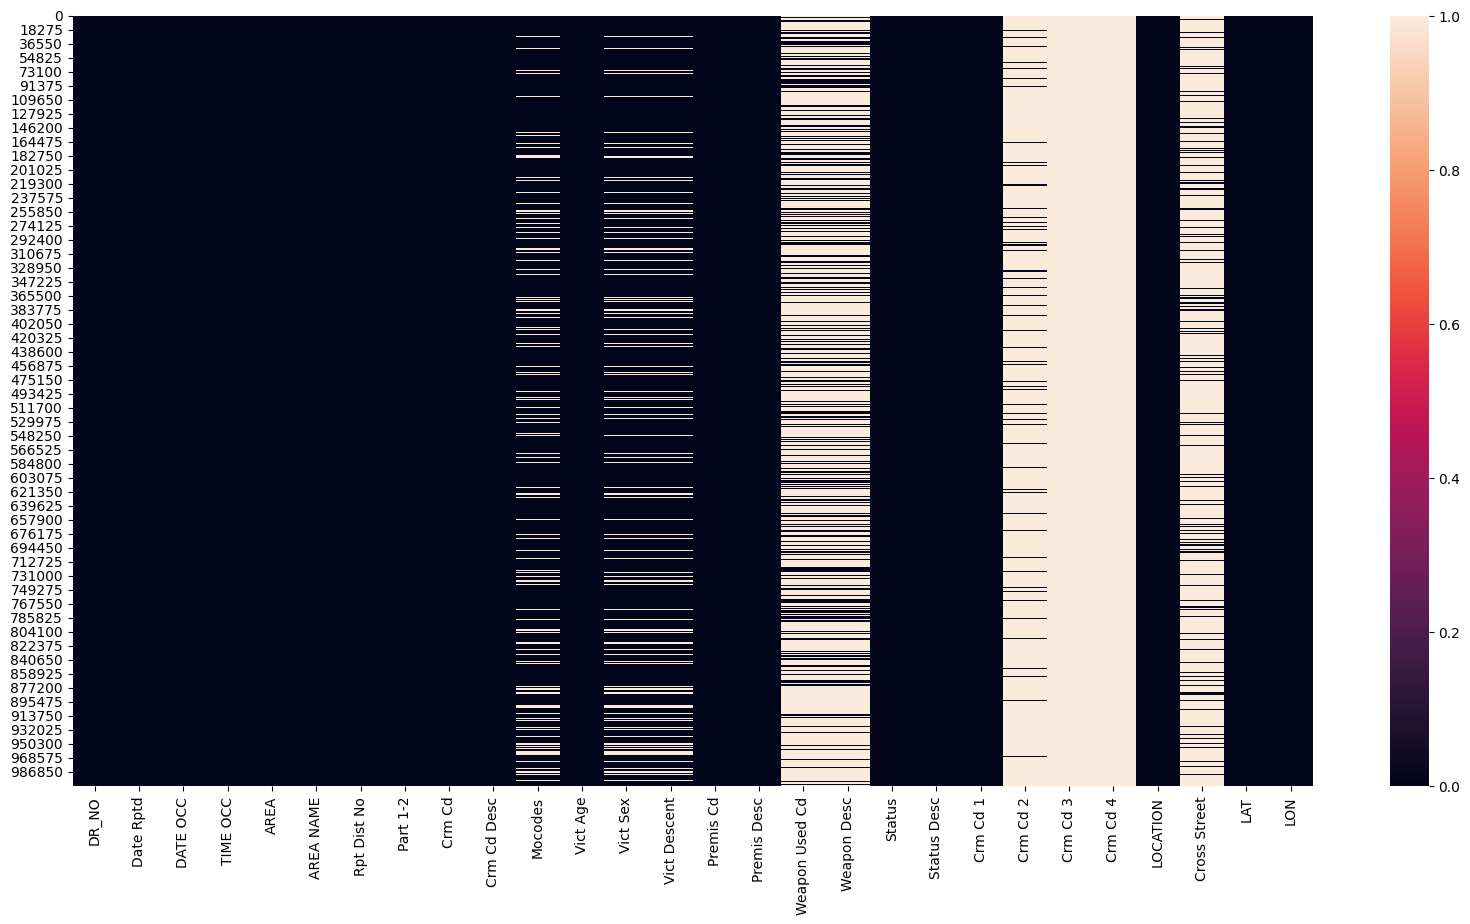

In [40]:
# Visualizing null values and na values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [41]:
df.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151706
Vict Age                0
Vict Sex           144730
Vict Descent       144742
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677850
Weapon Desc        677850
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935955
Crm Cd 3          1002795
Crm Cd 4          1005045
LOCATION                0
Cross Street       850872
LAT                     0
LON                     0
dtype: int64

In [42]:
# Let us take care of these null values
df['Mocodes']=df['Mocodes'].fillna('Not Available')
df['Vict Sex']=df['Vict Sex'].fillna("Not Recorded")
df['Vict Descent']=df['Vict Descent'].fillna("Not Recorded")
df['Weapon Used Cd']=df['Weapon Used Cd'].fillna("No Weapon Recorded")
df['Weapon Desc']=df['Weapon Desc'].fillna("No Weapon Used")
df['Crm Cd 2']=df['Crm Cd 2'].fillna("No Secondary Crime Code")
df['Crm Cd 3']=df['Crm Cd 3'].fillna("No Tertiery Crime Code")
df['Crm Cd 4']=df['Crm Cd 4'].fillna("No Quartinary Crime Code")
df['Crm Cd 1']=df['Crm Cd 1'].fillna("No Primary Crime Code")
df['Cross Street']=df['Cross Street'].fillna("Unknown")
df['Premis Desc'].replace(['NaN', 'nan', 'null', 'None', ''], np.nan, inplace=True)
df['Premis Desc'] = df['Premis Desc'].fillna("Not Recorded")
df['Premis Cd']=df['Premis Cd'].fillna("No Premise Code")

C:\Users\Samanyu K\AppData\Local\Temp\ipykernel_17868\3429464971.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Premis Desc'].replace(['NaN', 'nan', 'null', 'None', ''], np.nan, inplace=True)


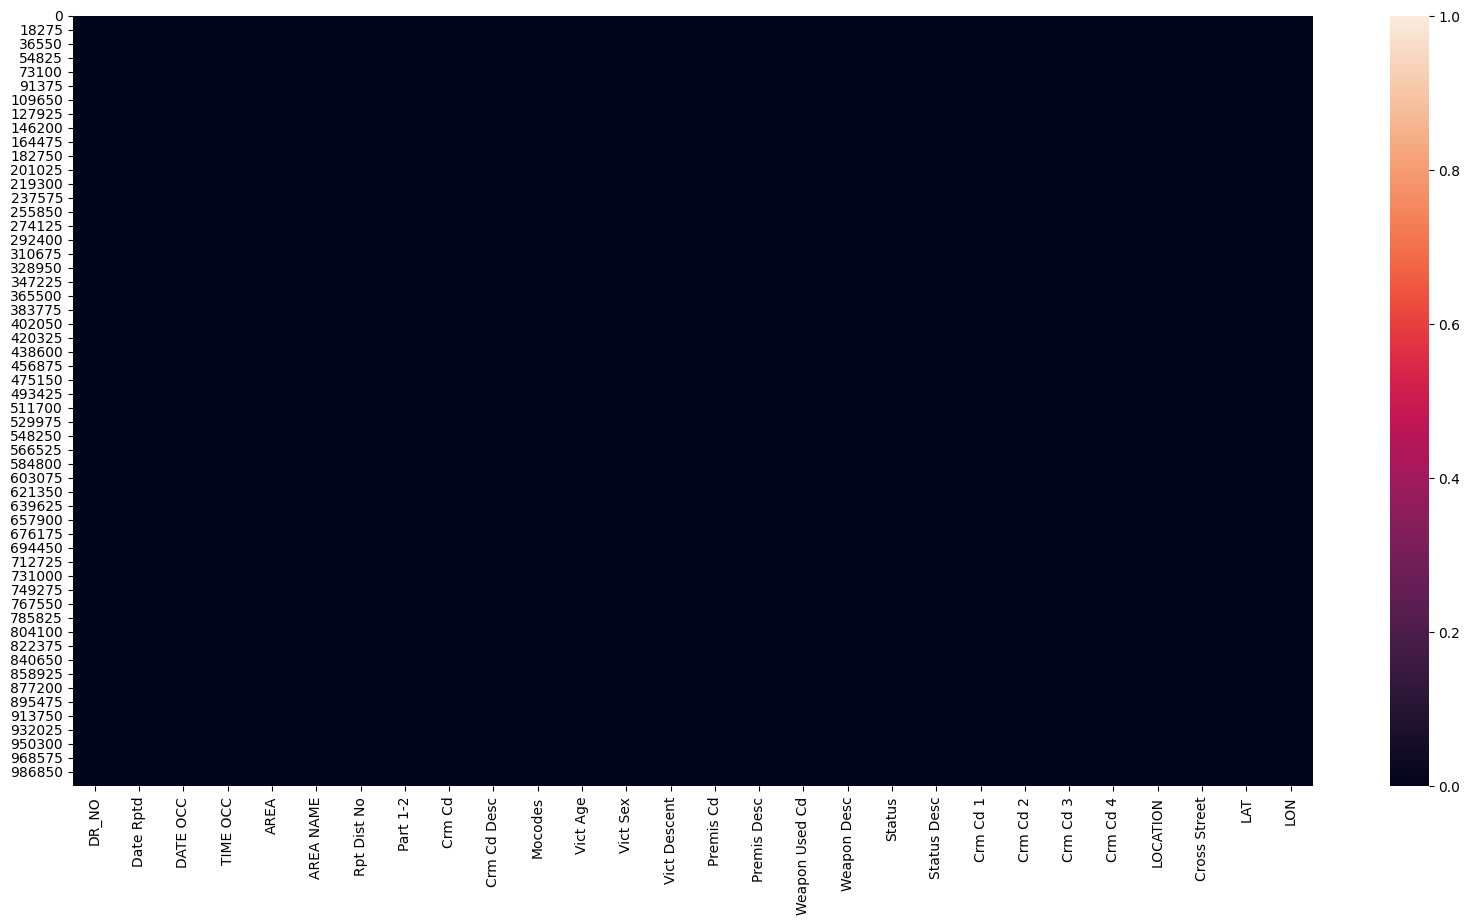

In [43]:
# Visualizing null values again
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005109 entries, 0 to 1005108
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005109 non-null  int64  
 1   Date Rptd       1005109 non-null  object 
 2   DATE OCC        1005109 non-null  object 
 3   TIME OCC        1005109 non-null  int64  
 4   AREA            1005109 non-null  int64  
 5   AREA NAME       1005109 non-null  object 
 6   Rpt Dist No     1005109 non-null  int64  
 7   Part 1-2        1005109 non-null  int64  
 8   Crm Cd          1005109 non-null  int64  
 9   Crm Cd Desc     1005109 non-null  object 
 10  Mocodes         1005109 non-null  object 
 11  Vict Age        1005109 non-null  int64  
 12  Vict Sex        1005109 non-null  object 
 13  Vict Descent    1005109 non-null  object 
 14  Premis Cd       1005109 non-null  object 
 15  Premis Desc     1005109 non-null  object 
 16  Weapon Used Cd  1005109 non-null  ob

In [45]:
# We have taken care of the null values and have dropped duplicates, now let us go column by column standardizing it
# First we take care of Reported Date and Occurence Date
df[['Date Rptd', 'daterptdtime']] = df['Date Rptd'].str.split(" ", expand=True,n=1)
df[['DATE OCC', 'dateoccdtime']] = df['DATE OCC'].str.split(" ", expand=True,n=1)
df.drop(columns=['daterptdtime','dateoccdtime'],inplace=True)
df['Date Rptd']=pd.to_datetime(df['Date Rptd'],format='%m/%d/%Y')
df['DATE OCC']=pd.to_datetime(df['DATE OCC'],format='%m/%d/%Y')

In [46]:
# Let us now look into the Time the crime Occured
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
df['TIME OCC']=df['TIME OCC'].apply(lambda x: x[:2]+":"+x[2:])

In [47]:
# Area (It represents the Area Code) and the Area Names can be mapped in a one to one relation which is shown below
mapp = df.groupby(['AREA', 'AREA NAME']).size().reset_index(name='count')
print(mapp)
# No cleaning needed for these two columns

    AREA    AREA NAME  count
0      1      Central  69672
1      2      Rampart  46826
2      3    Southwest  57512
3      4   Hollenbeck  37097
4      5       Harbor  41402
5      6    Hollywood  52430
6      7     Wilshire  48239
7      8      West LA  45731
8      9     Van Nuys  42883
9     10  West Valley  42157
10    11    Northeast  42962
11    12  77th Street  61758
12    13       Newton  49177
13    14      Pacific  59521
14    15  N Hollywood  51106
15    16     Foothill  33136
16    17   Devonshire  41764
17    18    Southeast  49936
18    19      Mission  40353
19    20      Olympic  50071
20    21      Topanga  41376


In [48]:
# We look into the type of Crime committed
df['Part 1-2']=df['Part 1-2'].apply(lambda x:'Indictable Offence' if x==1 else 'Misdemeanor')
df

In [49]:
# Let us look into the victims age
df['Vict Age'].nunique()

104

In [50]:
# Inital analysis concludes that the Victims Age has 104 unique values which clearly raises questions.It also concludes that the feature contains negative values and also 0
# Let us first take a look into all the unique values and then decide what we can do
d=df['Vict Age'].unique()
d=np.sort(d)
for i in d:
    print(i)

-4
-3
-2
-1
0
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
120


In [51]:
# We have some outliers -4,-3,-2,-1,0 and 120 are outliers, let us update them using the average ages of the victims( We can also Update it as Not Avaialable)
df['Vict Age'] = df['Vict Age'].replace([-4, -3, -2, -1, 120], np.nan)
df['Vict Age']=df['Vict Age'].fillna(df['Vict Age'].mean())
df['Vict Age']=df['Vict Age'].round(0)

In [52]:
# Let us look at the Victims Gender
d=df['Vict Sex'].unique()
d=np.sort(d)
for i in d:
    print(i)

-
F
H
M
Not Recorded
X


In [53]:
dic={'F':'Female','M':'Male','X': 'Non-Binary','-':'Not Recorded','H': 'Not Recorded'}
df['Vict Sex']=df['Vict Sex'].map(dic)
df['Vict Sex']=df['Vict Sex'].fillna("Not Recorded")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005109 entries, 0 to 1005108
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1005109 non-null  int64         
 1   Date Rptd       1005109 non-null  datetime64[ns]
 2   DATE OCC        1005109 non-null  datetime64[ns]
 3   TIME OCC        1005109 non-null  object        
 4   AREA            1005109 non-null  int64         
 5   AREA NAME       1005109 non-null  object        
 6   Rpt Dist No     1005109 non-null  int64         
 7   Part 1-2        1005109 non-null  object        
 8   Crm Cd          1005109 non-null  int64         
 9   Crm Cd Desc     1005109 non-null  object        
 10  Mocodes         1005109 non-null  object        
 11  Vict Age        1005109 non-null  float64       
 12  Vict Sex        1005109 non-null  object        
 13  Vict Descent    1005109 non-null  object        
 14  Premis Cd       10

In [55]:
# Let us look into the Victims Descent
d=df['Vict Descent'].unique()
for i in d:
    print(i)

O
X
Not Recorded
W
H
B
A
K
C
F
Z
V
I
P
J
G
U
D
S
L
-


In [56]:
descent_map = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian',
    '-': 'Not Recorded'
}
df['Vict Descent'] = df['Vict Descent'].map(descent_map)
df['Vict Descent']=df['Vict Descent'].fillna("Not Recorded")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005109 entries, 0 to 1005108
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1005109 non-null  int64         
 1   Date Rptd       1005109 non-null  datetime64[ns]
 2   DATE OCC        1005109 non-null  datetime64[ns]
 3   TIME OCC        1005109 non-null  object        
 4   AREA            1005109 non-null  int64         
 5   AREA NAME       1005109 non-null  object        
 6   Rpt Dist No     1005109 non-null  int64         
 7   Part 1-2        1005109 non-null  object        
 8   Crm Cd          1005109 non-null  int64         
 9   Crm Cd Desc     1005109 non-null  object        
 10  Mocodes         1005109 non-null  object        
 11  Vict Age        1005109 non-null  float64       
 12  Vict Sex        1005109 non-null  object        
 13  Vict Descent    1005109 non-null  object        
 14  Premis Cd       10

In [58]:
# No need cleaning for Premis Code, let us look at Premis Desc
d=df['Premis Desc'].unique()
for i in d:
    print(i)

STREET
BUS STOP/LAYOVER (ALSO QUERY 124)
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
CLOTHING STORE
PUBLIC STORAGE
JEWELRY STORE
OTHER BUSINESS
PARKING LOT
ALLEY
GAS STATION
CAR WASH
SINGLE FAMILY DWELLING
CONDOMINIUM/TOWNHOUSE
RESTAURANT/FAST FOOD
SIDEWALK
NURSING/CONVALESCENT/RETIREMENT HOME
MARKET
GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)
DRIVEWAY
MINI-MART
YARD (RESIDENTIAL/BUSINESS)
VEHICLE, PASSENGER/TRUCK
GARAGE/CARPORT
PARKING UNDERGROUND/BUILDING
NAIL SALON
PORCH, RESIDENTIAL
DRUG STORE
MTA BUS
MTA - RED LINE - VERMONT/BEVERLY
OTHER PREMISE
DAY CARE/CHILDREN*
BUS STOP
POLICE FACILITY
MISSIONS/SHELTERS
CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)
PHARMACY INSIDE STORE OR SUPERMARKET*
DISCOUNT STORE (99 CENT,DOLLAR,ETC.
MTA - RED LINE - 7TH AND METRO CENTER
OFFICE BUILDING/OFFICE
OTHER STORE
DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*
HOTEL
MORTUARY
OTHER RESIDENCE
OTHER/OUTSIDE
MTA - EXPO LINE - EXPO/LA BREA
JUNIOR HIGH SCHOOL
NIGHT CLUB (OPEN EVENIN

In [59]:
# We can see that there is an nan in the Premis Desc, let us change that too not recorded
df['Premis Desc']=df['Premis Desc'].str.replace('nan','Not Recorded')
d=df['Premis Desc'].unique()
for i in d:
    print(i)

STREET
BUS STOP/LAYOVER (ALSO QUERY 124)
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
CLOTHING STORE
PUBLIC STORAGE
JEWELRY STORE
OTHER BUSINESS
PARKING LOT
ALLEY
GAS STATION
CAR WASH
SINGLE FAMILY DWELLING
CONDOMINIUM/TOWNHOUSE
RESTAURANT/FAST FOOD
SIDEWALK
NURSING/CONVALESCENT/RETIREMENT HOME
MARKET
GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)
DRIVEWAY
MINI-MART
YARD (RESIDENTIAL/BUSINESS)
VEHICLE, PASSENGER/TRUCK
GARAGE/CARPORT
PARKING UNDERGROUND/BUILDING
NAIL SALON
PORCH, RESIDENTIAL
DRUG STORE
MTA BUS
MTA - RED LINE - VERMONT/BEVERLY
OTHER PREMISE
DAY CARE/CHILDREN*
BUS STOP
POLICE FACILITY
MISSIONS/SHELTERS
CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)
PHARMACY INSIDE STORE OR SUPERMARKET*
DISCOUNT STORE (99 CENT,DOLLAR,ETC.
MTA - RED LINE - 7TH AND METRO CENTER
OFFICE BUILDING/OFFICE
OTHER STORE
DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*
HOTEL
MORTUARY
OTHER RESIDENCE
OTHER/OUTSIDE
MTA - EXPO LINE - EXPO/LA BREA
JUNIOR HIGH SCHOOL
NIGHT CLUB (OPEN EVENIN

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005109 entries, 0 to 1005108
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1005109 non-null  int64         
 1   Date Rptd       1005109 non-null  datetime64[ns]
 2   DATE OCC        1005109 non-null  datetime64[ns]
 3   TIME OCC        1005109 non-null  object        
 4   AREA            1005109 non-null  int64         
 5   AREA NAME       1005109 non-null  object        
 6   Rpt Dist No     1005109 non-null  int64         
 7   Part 1-2        1005109 non-null  object        
 8   Crm Cd          1005109 non-null  int64         
 9   Crm Cd Desc     1005109 non-null  object        
 10  Mocodes         1005109 non-null  object        
 11  Vict Age        1005109 non-null  float64       
 12  Vict Sex        1005109 non-null  object        
 13  Vict Descent    1005109 non-null  object        
 14  Premis Cd       10

In [61]:
# Let us look at Weapons Used its code as well as Description
print(df['Weapon Used Cd'].value_counts(),'\n')
print(df['Weapon Desc'].value_counts())

Weapon Used Cd
No Weapon Recorded    677850
400.0                 174769
500.0                  36392
511.0                  23846
102.0                  20183
109.0                   7267
200.0                   6838
106.0                   6581
207.0                   5880
512.0                   3730
307.0                   3260
306.0                   2739
312.0                   2469
212.0                   2415
204.0                   2266
308.0                   2249
304.0                   2088
205.0                   1921
114.0                   1864
201.0                   1697
302.0                   1387
311.0                   1355
113.0                   1252
101.0                   1186
215.0                   1144
107.0                    948
515.0                    946
218.0                    932
223.0                    884
219.0                    783
310.0                    706
301.0                    688
506.0                    681
216.0                    659

In [62]:
# We will look into the Code and Description and see if there is a one to one relation between them
mapp = df.groupby(['Weapon Used Cd', 'Weapon Desc']).size().reset_index(name='count')
pd.set_option('display.max_rows',None)
print(mapp.sort_values(by='count',ascending=False))
# This Confirms that Weapon Code as well as its description are related in the one to one relation

        Weapon Used Cd                                     Weapon Desc   count
79  No Weapon Recorded                                  No Weapon Used  677850
61               400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  174769
62               500.0                     UNKNOWN WEAPON/OTHER WEAPON   36392
73               511.0                                   VERBAL THREAT   23846
1                102.0                                        HAND GUN   20183
8                109.0                           SEMI-AUTOMATIC PISTOL    7267
25               200.0                KNIFE WITH BLADE 6INCHES OR LESS    6838
5                106.0                                 UNKNOWN FIREARM    6581
32               207.0                                     OTHER KNIFE    5880
74               512.0                               MACE/PEPPER SPRAY    3730
55               307.0                                         VEHICLE    3260
54               306.0                              

In [63]:
# We will look into the Status Code and Description and see if there is a one to one relation between them
mapp = df.groupby(['Status', 'Status Desc']).size().reset_index(name='count')
pd.set_option('display.max_rows',None)
print(mapp.sort_values(by='count',ascending=False))
# This Confirms that Status Code as well as its description are related in the one to one relation

  Status   Status Desc   count
3     IC   Invest Cont  803563
1     AO   Adult Other  109441
0     AA  Adult Arrest   86963
4     JA    Juv Arrest    3266
5     JO     Juv Other    1869
2     CC           UNK       6


In [64]:
def clean_location(loc):
    if pd.isnull(loc):
        return "Unknown"
    loc = re.sub(r'\s+', ' ', loc.strip())
    loc = re.sub(r'(\d+)\s{2,}', r'\1 ', loc)
    return loc.strip()

df['LOCATION'] = df['LOCATION'].apply(clean_location)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005109 entries, 0 to 1005108
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1005109 non-null  int64         
 1   Date Rptd       1005109 non-null  datetime64[ns]
 2   DATE OCC        1005109 non-null  datetime64[ns]
 3   TIME OCC        1005109 non-null  object        
 4   AREA            1005109 non-null  int64         
 5   AREA NAME       1005109 non-null  object        
 6   Rpt Dist No     1005109 non-null  int64         
 7   Part 1-2        1005109 non-null  object        
 8   Crm Cd          1005109 non-null  int64         
 9   Crm Cd Desc     1005109 non-null  object        
 10  Mocodes         1005109 non-null  object        
 11  Vict Age        1005109 non-null  float64       
 12  Vict Sex        1005109 non-null  object        
 13  Vict Descent    1005109 non-null  object        
 14  Premis Cd       10

In [66]:
# Now we have taken care of all the columns, let us take care of the column names
df=df.rename(columns={'DR_NO':'DRNumber','Date Rptd':'DateReported','DATE OCC':'DateOccured','TIME OCC':'TimeOccured',
                      'AREA':'AreaCode','AREA NAME':'AreaName','Rpt Dist No':'ReportedDistrictNumber','Part 1-2':'CrimeClassification',
                      'Crm Cd':'CrimeCode','Crm Cd Desc':'CrimeCodeDescription','Vict Age':'VictimAge','Vict Sex':'VictimSex','Vict Descent':'VictimDescent',
                      'Premis Cd':'PremisCode','Premis Desc':'PremisDescription','Weapon Used Cd':'WeaponUsedCode','Weapon Desc':'WeaponDescription',
                      'Status':'StatusCode','Status Desc':'StatusDescription',' Crm Cd 1':'PrimaryCrimeCode','Crm Cd 2':'SecondaryCrimeCode',
                      'Crm Cd 3':'TertieryCrimeCode','Crm Cd 4':'QuartinaryCrimeCode','LOCATION':'location','LAT':'LatitudeCoordinates','LON':'longitudeCoordinates'})
df

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005109 entries, 0 to 1005108
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   DRNumber                1005109 non-null  int64         
 1   DateReported            1005109 non-null  datetime64[ns]
 2   DateOccured             1005109 non-null  datetime64[ns]
 3   TimeOccured             1005109 non-null  object        
 4   AreaCode                1005109 non-null  int64         
 5   AreaName                1005109 non-null  object        
 6   ReportedDistrictNumber  1005109 non-null  int64         
 7   CrimeClassification     1005109 non-null  object        
 8   CrimeCode               1005109 non-null  int64         
 9   CrimeCodeDescription    1005109 non-null  object        
 10  Mocodes                 1005109 non-null  object        
 11  VictimAge               1005109 non-null  float64       
 12  VictimSex     

In [68]:
df.to_csv(r"C:\Users\Samanyu K\Downloads\Crime_Data_from_2020_to_Present_Cleaned.csv")

# Data Visualization